## Importing Dependencies

In [1]:
from datetime import datetime

import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
from matplotlib import rcParams

## Loading the Dataset: 
The data was read using pandas.csv.

In [3]:
df2= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2012.csv", parse_dates=["Date"])
df3= pd.read_csv(r"Cheltenham Swindon Road Hourly 2013.csv", parse_dates=["Date"])
df4= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2014.csv", parse_dates=["Date"])
df5= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2015.csv", parse_dates=["Date"]) 
df6= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2016.csv", parse_dates=["Date"])
df7= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2017.csv", parse_dates=["Date"])
df8= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2018 .csv", parse_dates=["Date"])
df9= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2019.csv", parse_dates=["Date"])
df10= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2020.csv", parse_dates=["Date"])
df11= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2021.csv", parse_dates=["Date"])


C:\Users\osesi\anaconda3\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13/01/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\osesi\anaconda3\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '14/01/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\osesi\anaconda3\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15/01/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\osesi\anaconda3\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '16/01/2012' in DD/MM/Y

In [4]:
#Concatenate all the dataframes
merged_df = pd.concat([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11])


In [5]:
merged_df

,Date,Month,Hour,Nitric Oxide m-3 (20'C 1013mb),Nitrogen Dioxide m-3 (20'C 1013mb),Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)
0,2012-01-01,Jan-12,0,4.0,8.0,13.0
1,2012-01-01,NaN,1,4.0,8.0,13.0
2,2012-01-01,NaN,2,4.0,8.0,13.0
3,2012-01-01,NaN,3,2.0,6.0,10.0
4,2012-01-01,NaN,4,1.0,6.0,8.0
...,...,...,...,...,...,...
8755,2021-12-31,NaN,19,11.0,31.0,48.0
8756,2021-12-31,NaN,20,9.0,19.0,33.0
8757,2021-12-31,NaN,21,5.0,13.0,21.0
8758,2021-12-31,NaN,22,2.0,13.0,17.0


In [6]:
df_data = merged_df.copy()
df_data

,Date,Month,Hour,Nitric Oxide m-3 (20'C 1013mb),Nitrogen Dioxide m-3 (20'C 1013mb),Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)
0,2012-01-01,Jan-12,0,4.0,8.0,13.0
1,2012-01-01,NaN,1,4.0,8.0,13.0
2,2012-01-01,NaN,2,4.0,8.0,13.0
3,2012-01-01,NaN,3,2.0,6.0,10.0
4,2012-01-01,NaN,4,1.0,6.0,8.0
...,...,...,...,...,...,...
8755,2021-12-31,NaN,19,11.0,31.0,48.0
8756,2021-12-31,NaN,20,9.0,19.0,33.0
8757,2021-12-31,NaN,21,5.0,13.0,21.0
8758,2021-12-31,NaN,22,2.0,13.0,17.0


## Data Preprocessing
Data columns that were not required to satisfy the objectives of this analysis were dropped
We cast the Date column to a datetime format. The timeseries cross validation method was used to split the data

In [7]:
df_data.drop(["Nitric Oxide m-3 (20'C 1013mb)"], axis=1, inplace=True)
df_data.drop(["Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)"], axis=1, inplace=True)
df_data.drop(['Month'], axis=1, inplace=True)
#df_data.drop(['Hour'], axis=1, inplace=True)
df_data

,Date,Hour,Nitrogen Dioxide m-3 (20'C 1013mb)
0,2012-01-01,0,8.0
1,2012-01-01,1,8.0
2,2012-01-01,2,8.0
3,2012-01-01,3,6.0
4,2012-01-01,4,6.0
...,...,...,...
8755,2021-12-31,19,31.0
8756,2021-12-31,20,19.0
8757,2021-12-31,21,13.0
8758,2021-12-31,22,13.0


## Renaming the Columns

In [8]:
# Renaming Columns
df_data.rename(columns = {"Nitrogen Dioxide m-3 (20'C 1013mb)": 'NO2'}, inplace=True)

## CHECKING FOR MISSING VALUES

In [9]:
df_data.isnull().sum().sum()

2370

In [10]:
df_data['NO2'] = df_data['NO2'].replace(0.0, float('NaN'))

print(df_data)

           Date  Hour   NO2
0    2012-01-01     0   8.0
1    2012-01-01     1   8.0
2    2012-01-01     2   8.0
3    2012-01-01     3   6.0
4    2012-01-01     4   6.0
...         ...   ...   ...
8755 2021-12-31    19  31.0
8756 2021-12-31    20  19.0
8757 2021-12-31    21  13.0
8758 2021-12-31    22  13.0
8759 2021-12-31    23  11.0

[87672 rows x 3 columns]


In [11]:
df_data["NO2"].fillna(method="ffill", inplace=True)

In [12]:
df=df_data

# Convert "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Merge "Date" and "Hour" columns into a single datetime column
df['Datetime'] = df['Date'] + pd.to_timedelta(df['Hour'], unit='H')

# Drop the original "Date" and "Hour" columns
df = df.drop(['Date', 'Hour'], axis=1)

# Print the updated DataFrame
print(df)

       NO2            Datetime
0      8.0 2012-01-01 00:00:00
1      8.0 2012-01-01 01:00:00
2      8.0 2012-01-01 02:00:00
3      6.0 2012-01-01 03:00:00
4      6.0 2012-01-01 04:00:00
...    ...                 ...
8755  31.0 2021-12-31 19:00:00
8756  19.0 2021-12-31 20:00:00
8757  13.0 2021-12-31 21:00:00
8758  13.0 2021-12-31 22:00:00
8759  11.0 2021-12-31 23:00:00

[87672 rows x 2 columns]


In [13]:
df_data=df

In [14]:
df_data = df_data.set_index('Datetime')
df_data.sort_index(inplace=True)


In [15]:
filtered_data = df_data[(df_data.index.year >= 2012) & (df_data.index.year <= 2021)]
group_data = filtered_data.groupby(filtered_data.index.month)
description = group_data['NO2'].describe()
print(description)

           count       mean        std  min   25%   50%   75%    max
Datetime                                                            
1         7440.0  37.710753  23.189012  2.0  19.0  33.0  52.0  136.0
2         6792.0  35.368669  21.911929  2.0  19.0  31.0  46.0  149.0
3         7440.0  35.000941  21.330754  2.0  19.0  31.0  48.0  142.0
4         7200.0  32.479306  19.307985  2.0  17.0  29.0  44.0  128.0
5         7440.0  30.252688  17.732622  2.0  17.0  27.0  40.0  138.0
6         7200.0  29.679167  17.672865  2.0  17.0  27.0  40.0  134.0
7         7440.0  29.427554  16.975881  2.0  17.0  27.0  40.0  138.0
8         7440.0  29.566398  16.966076  2.0  17.0  27.0  40.0  124.0
9         7200.0  32.143889  18.328222  2.0  17.0  31.0  44.0  149.0
10        7440.0  32.926882  19.836081  2.0  17.0  29.0  44.0  130.0
11        7200.0  38.063750  23.396323  2.0  19.0  34.0  52.0  157.0
12        7440.0  34.190726  21.405175  2.0  17.0  31.0  48.0  126.0


In [16]:
filtered_data = df_data[(df_data.index.year >= 2012) & (df_data.index.year <= 2021)]
group_data = filtered_data['NO2'].resample('W').mean()
print(group_data)

Datetime
2012-01-01    13.416667
2012-01-08    34.220238
2012-01-15    52.571429
2012-01-22    44.398810
2012-01-29    46.238095
                ...    
2021-12-05    27.041667
2021-12-12    22.398810
2021-12-19    27.690476
2021-12-26    33.327381
2022-01-02    20.116667
Freq: W-SUN, Name: NO2, Length: 523, dtype: float64


In [17]:
filtered_data = df_data[(df_data.index.year >= 2012) & (df_data.index.year <= 2021)]
group_data = filtered_data.groupby(filtered_data.index.dayofweek)
description = group_data['NO2'].describe()
print(description)


            count       mean        std  min   25%   50%   75%    max
Datetime                                                             
0         12528.0  33.560664  20.652801  2.0  17.0  31.0  44.0  134.0
1         12528.0  34.556753  20.929193  2.0  19.0  31.0  46.0  149.0
2         12528.0  33.975415  20.151376  2.0  19.0  31.0  46.0  147.0
3         12528.0  34.692768  20.409171  2.0  19.0  31.0  48.0  140.0
4         12528.0  35.134898  21.212872  2.0  19.0  33.0  48.0  157.0
5         12504.0  31.374520  19.046467  2.0  17.0  29.0  42.0  136.0
6         12528.0  28.053799  17.561273  2.0  15.0  25.0  36.0  149.0


In [18]:
import pandas as pd

# Filter the data for the desired years
filtered_data = df_data[(df_data.index.year >= 2012) & (df_data.index.year <= 2021)]

# Create a new column to represent the season based on the month
filtered_data['Season'] = filtered_data.index.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'})

# Group the data by season and day of the week
group_data = filtered_data.groupby(['Season', filtered_data.index.dayofweek])

# Calculate the description values for the 'NO2' column
description = group_data['NO2'].describe()

print(description)

                  count       mean        std  min   25%   50%   75%    max
Season Datetime                                                            
Autumn 0         3120.0  34.992308  20.763526  2.0  19.0  33.0  48.0  122.0
       1         3120.0  35.479487  21.308771  2.0  19.0  31.0  48.0  132.0
       2         3120.0  34.067308  20.233978  2.0  19.0  31.0  46.0  126.0
       3         3120.0  35.676603  21.130434  2.0  19.0  33.0  48.0  140.0
       4         3120.0  36.941026  22.704390  2.0  19.0  34.0  50.0  157.0
       5         3120.0  33.952564  19.596809  2.0  19.0  31.0  46.0  117.0
       6         3120.0  29.426282  18.704560  2.0  15.0  25.0  40.0  149.0
Spring 0         3144.0  32.587468  19.833846  2.0  17.0  29.0  44.0  115.0
       1         3144.0  33.094148  19.247307  2.0  19.0  31.0  44.0  117.0
       2         3144.0  34.852417  20.558133  2.0  19.0  31.0  46.0  128.0
       3         3168.0  35.300821  20.289913  2.0  19.0  33.0  48.0  126.0
       4    

In [19]:
import pandas as pd

# Filter the data for the desired years
filtered_data = df_data[(df_data.index.year >= 2012) & (df_data.index.year <= 2021)]

# Create a new column to represent the season based on the month
filtered_data['Season'] = filtered_data.index.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'})

# Group the data by season
grouped_data = filtered_data.groupby('Season')

# Calculate the description values for the 'NO2' column grouped by season
description = grouped_data['NO2'].describe()

print(description)

          count       mean        std  min   25%   50%   75%    max
Season                                                             
Autumn  21840.0  34.362225  20.785651  2.0  19.0  31.0  46.0  157.0
Spring  22080.0  32.578714  19.611318  2.0  17.0  29.0  44.0  142.0
Summer  22080.0  29.556386  17.202528  2.0  17.0  27.0  40.0  138.0
Winter  21672.0  35.768319  22.237908  2.0  19.0  31.0  48.0  149.0


In [20]:
filtered_data = df_data[(df_data.index.year >= 2012) & (df_data.index.year <= 2021)]
group_data = filtered_data.groupby(filtered_data.index.year)
description = group_data['NO2'].describe()
print(description)

           count       mean        std  min   25%   50%   75%    max
Datetime                                                            
2012      8784.0  37.308515  22.274012  2.0  21.0  34.0  50.0  142.0
2013      8760.0  36.466553  22.288030  2.0  19.0  33.0  50.0  157.0
2014      8760.0  34.774429  20.216790  2.0  19.0  33.0  48.0  124.0
2015      8760.0  33.557763  19.259160  2.0  19.0  31.0  44.0  149.0
2016      8784.0  33.854053  20.568010  2.0  19.0  31.0  44.0  147.0
2017      8760.0  36.397374  20.754937  2.0  21.0  33.0  48.0  134.0
2018      8760.0  32.459132  18.124279  2.0  19.0  31.0  42.0  122.0
2019      8760.0  35.711872  20.461149  2.0  21.0  33.0  48.0  126.0
2020      8784.0  24.707650  16.418940  2.0  13.0  21.0  33.0  109.0
2021      8760.0  25.274543  15.527997  2.0  13.0  23.0  33.0  101.0


In [21]:
import pandas as pd

filtered_data = df_data[(df_data.index.year >= 2012) & (df_data.index.year <= 2021)]
group_data = filtered_data.groupby(pd.Grouper(freq='H')).mean()  # Group by hour of the day
hourly_description = group_data.groupby(group_data.index.hour)['NO2'].describe()

print(hourly_description)

           count       mean        std  min   25%   50%   75%    max
Datetime                                                            
0         3653.0  19.263345  13.222594  2.0  10.0  15.0  25.0   90.0
1         3653.0  16.720777  11.655929  2.0   8.0  13.0  21.0   77.0
2         3653.0  15.595127  10.769620  2.0   8.0  13.0  21.0   75.0
3         3653.0  15.367096  10.493840  2.0   8.0  11.0  19.0   75.0
4         3653.0  17.285245  10.642847  2.0  10.0  15.0  23.0   75.0
5         3653.0  23.342458  13.544424  2.0  11.0  21.0  33.0   77.0
6         3653.0  33.891596  18.928839  2.0  19.0  31.0  46.0  115.0
7         3653.0  41.222831  22.151454  2.0  25.0  38.0  54.0  136.0
8         3653.0  42.429784  22.951287  2.0  25.0  38.0  55.0  157.0
9         3653.0  40.757186  20.766392  2.0  25.0  36.0  52.0  147.0
10        3653.0  39.263893  18.074445  2.0  27.0  36.0  50.0  142.0
11        3653.0  38.824254  16.858287  2.0  27.0  36.0  48.0  120.0
12        3653.0  38.269915  16.23

In [22]:
df_data.index = pd.to_datetime(df_data.index)

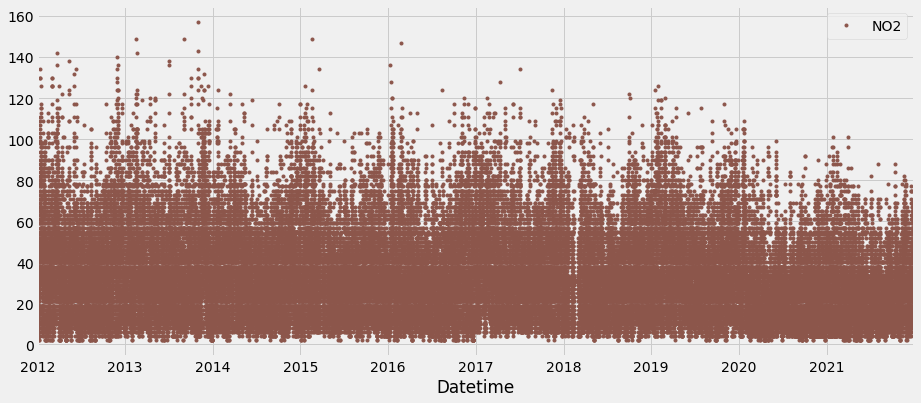

In [23]:
df_data.plot(style='.',
            figsize=(14, 6),
            color=color_pal[5],)
            #title='NO2 Concentration Distribution'
plt.show()

In [24]:
#df_data.plot(figsize=(12,6))

## Checking Data For Seasonality

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
#df_data = df_data.set_index('Datetime')

## Create Features

In [27]:
import datetime

df_data["date"] = df_data.index.date
df_data["year"] = df_data.index.year
df_data["quarter"] = df_data.index.quarter
df_data["month"] = df_data.index.month
df_data["dayoftheweek"] = df_data.index.day
df_data["dayoftheyear"] = df_data.index.dayofyear

# Extract the weekday name using strftime() method
df_data["weekday"] = df_data.index.strftime('%A')

df_data["woy"] = df_data.index.date
df_data["hour"] = df_data.index.hour


In [28]:
df_data.head()

,NO2,date,year,quarter,month,dayoftheweek,dayoftheyear,weekday,woy,hour
Datetime,,,,,,,,,,
2012-01-01 00:00:00,8.0,2012-01-01,2012,1,1,1,1,Sunday,2012-01-01,0
2012-01-01 01:00:00,8.0,2012-01-01,2012,1,1,1,1,Sunday,2012-01-01,1
2012-01-01 02:00:00,8.0,2012-01-01,2012,1,1,1,1,Sunday,2012-01-01,2
2012-01-01 03:00:00,6.0,2012-01-01,2012,1,1,1,1,Sunday,2012-01-01,3
2012-01-01 04:00:00,6.0,2012-01-01,2012,1,1,1,1,Sunday,2012-01-01,4


In [29]:
df1 = df_data.pivot_table(index=df_data["hour"], columns="weekday", values="NO2", aggfunc="sum")

In [30]:
df1.head()

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,10077.0,8710.0,10847.0,10898.0,9709.0,10201.0,9927.0
1,8672.0,7691.0,9214.0,9454.0,8459.0,9065.0,8526.0
2,8068.0,7428.0,8344.0,8516.0,8043.0,8598.0,7972.0
3,7987.0,7519.0,7993.0,7978.0,8048.0,8733.0,7878.0
4,9245.0,8894.0,8665.0,8239.0,9113.0,9877.0,9110.0


<AxesSubplot:title={'center':'NO2 Daily Trends'}, xlabel='hour'>

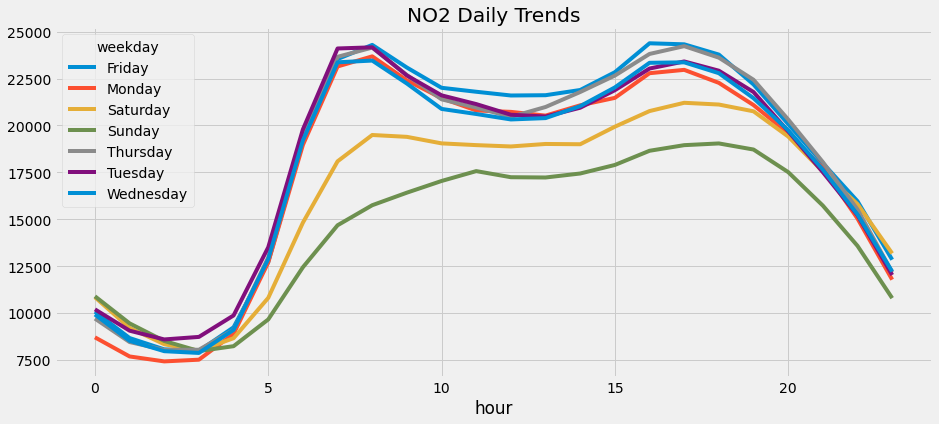

In [31]:
df1.plot(figsize=(14,6), title="NO2 Daily Trends")

## Understanding Seasonality Across Weeks and Months

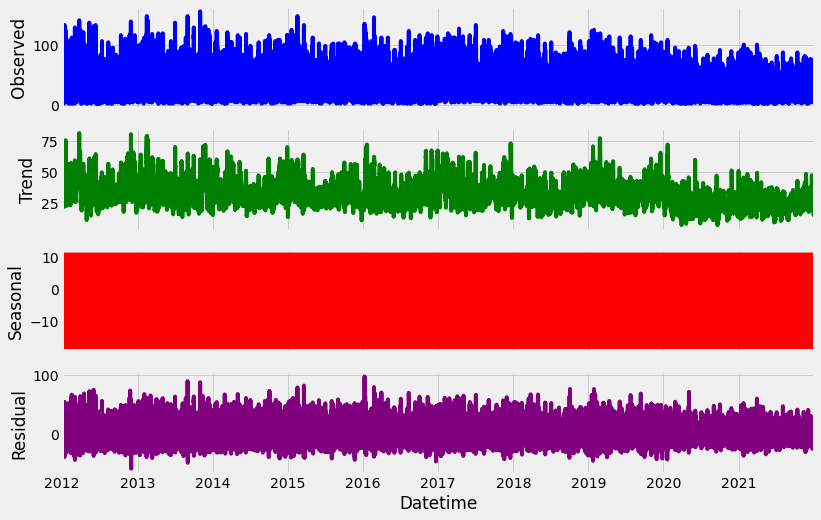

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

result = seasonal_decompose(df_data[["NO2"]], period=48)

plt.rcParams["figure.figsize"] = (12, 8)

fig, axes = plt.subplots(4, 1, sharex=True)

result.observed.plot(ax=axes[0], color="blue")
axes[0].set_ylabel("Observed")

result.trend.plot(ax=axes[1], color="green")
axes[1].set_ylabel("Trend")

result.seasonal.plot(ax=axes[2], color="red")
axes[2].set_ylabel("Seasonal")

result.resid.plot(ax=axes[3], color="purple")
axes[3].set_ylabel("Residual")

plt.show()


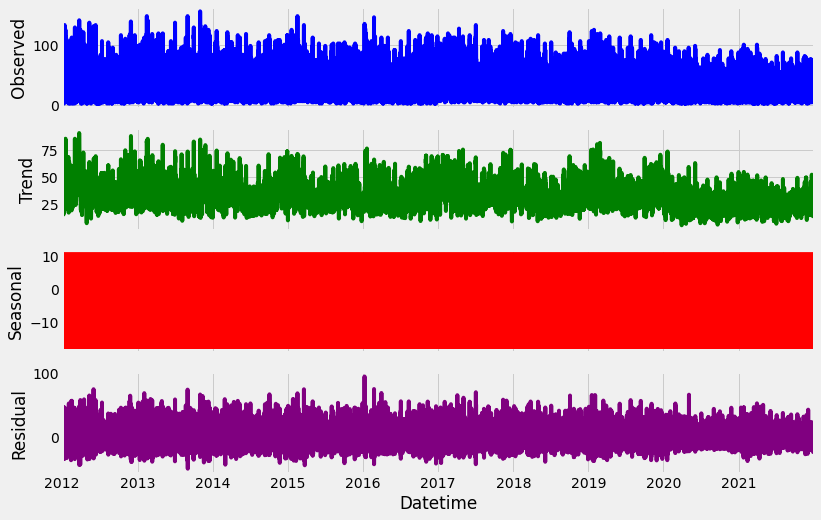

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

result = seasonal_decompose(df_data[["NO2"]], period=24)

plt.rcParams["figure.figsize"] = (12, 8)

fig, axes = plt.subplots(4, 1, sharex=True)

result.observed.plot(ax=axes[0], color="blue")
axes[0].set_ylabel("Observed")

result.trend.plot(ax=axes[1], color="green")
axes[1].set_ylabel("Trend")

result.seasonal.plot(ax=axes[2], color="red")
axes[2].set_ylabel("Seasonal")

result.resid.plot(ax=axes[3], color="purple")
axes[3].set_ylabel("Residual")

plt.show()

In [34]:
df_seawk = df_data.loc[df_data.index>"01-01-2021"]
df_seawk = df_data.loc[(df_data.index >="2021-01-12") & (df_data.index < "2021-01-19")]
display(df_seawk.head())
df_seawk=df_seawk.sort_index()

,NO2,date,year,quarter,month,dayoftheweek,dayoftheyear,weekday,woy,hour
Datetime,,,,,,,,,,
2021-01-12 00:00:00,10.0,2021-01-12,2021,1,1,12,12,Tuesday,2021-01-12,0
2021-01-12 01:00:00,10.0,2021-01-12,2021,1,1,12,12,Tuesday,2021-01-12,1
2021-01-12 02:00:00,6.0,2021-01-12,2021,1,1,12,12,Tuesday,2021-01-12,2
2021-01-12 03:00:00,6.0,2021-01-12,2021,1,1,12,12,Tuesday,2021-01-12,3
2021-01-12 04:00:00,8.0,2021-01-12,2021,1,1,12,12,Tuesday,2021-01-12,4


## Time Series Decomposition of Daily Seasonality within a Single Week

Text(0, 0.5, 'NO2')

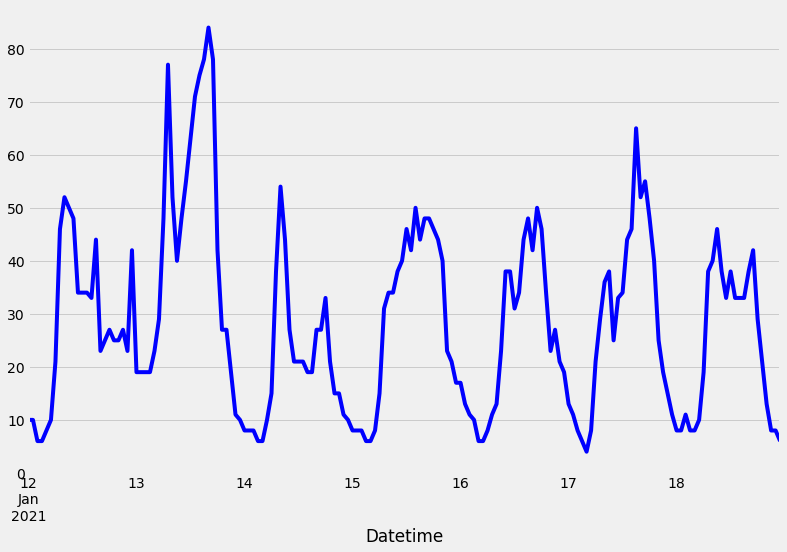

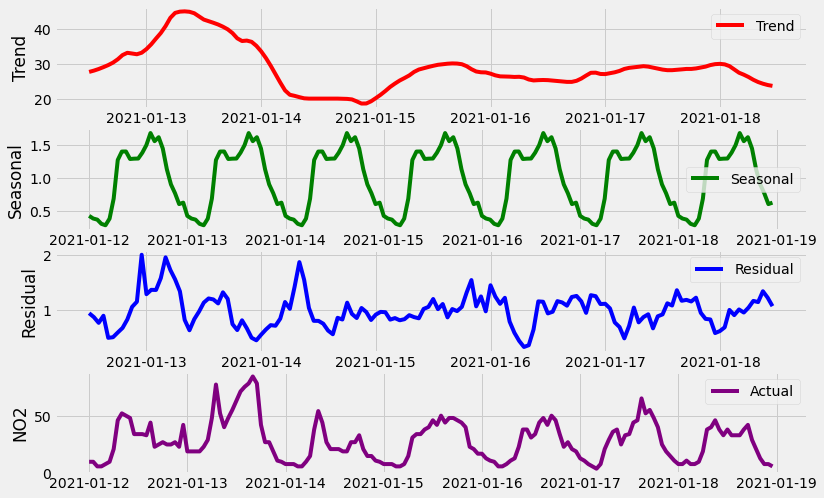

In [36]:
df_seawk = df_data.loc[(df_data.index >= "2021-01-12") & (df_data.index < "2021-01-19")]
df_seawk = df_seawk.sort_index()
df_seawk["NO2"].plot(color="blue", label="NO2")

result = seasonal_decompose(df_seawk["NO2"], period=24, model="multiplicative")

rcParams['figure.figsize'] = 12, 8

fig, axes = plt.subplots(4, 1)

# Set colors for each component
axes[0].plot(result.trend, color="red", label="Trend")
axes[1].plot(result.seasonal, color="green", label="Seasonal")
axes[2].plot(result.resid, color="blue", label="Residual")
axes[3].plot(df_seawk["NO2"], color="purple", label="Actual")

# Set legends and axis titles
axes[0].legend()
axes[0].set_ylabel("Trend")
axes[1].legend()
axes[1].set_ylabel("Seasonal")
axes[2].legend()
axes[2].set_ylabel("Residual")
axes[3].legend()
axes[3].set_ylabel("NO2")



## Time Series Decomposition of Weekly Seasonality within a Single Month

Text(0, 0.5, 'NO2')

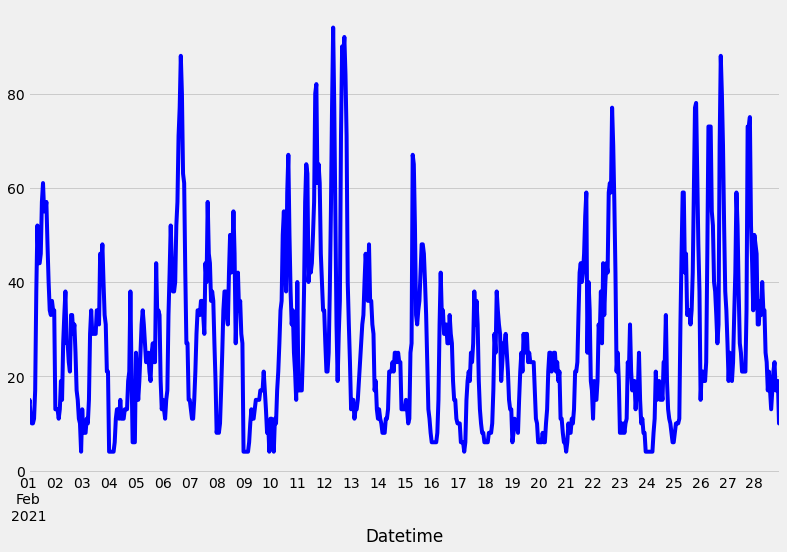

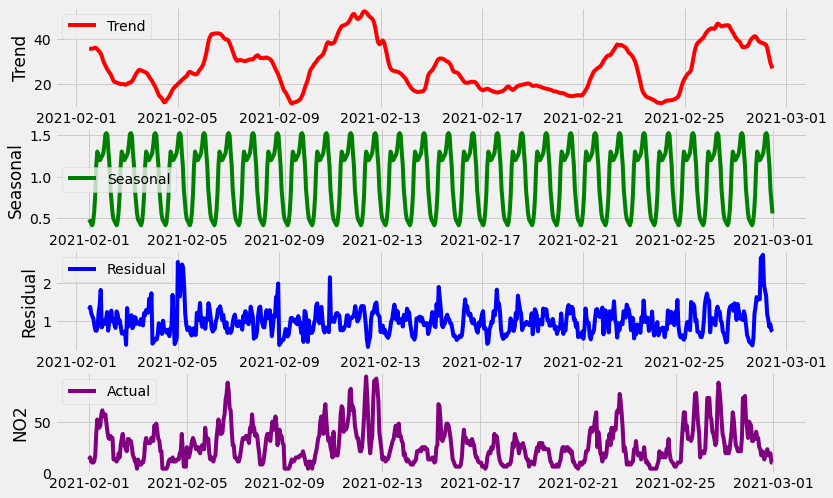

In [37]:
df_seawk = df_data.loc[(df_data.index >= "2021-02-01") & (df_data.index < "2021-03-01")]
df_seawk = df_seawk.sort_index()
df_seawk["NO2"].plot(color="blue", label="NO2")

result = seasonal_decompose(df_seawk["NO2"], period=24, model="multiplicative")

rcParams['figure.figsize'] = 12, 8

fig, axes = plt.subplots(4, 1)

# Set colors for each component
axes[0].plot(result.trend, color="red", label="Trend")
axes[1].plot(result.seasonal, color="green", label="Seasonal")
axes[2].plot(result.resid, color="blue", label="Residual")
axes[3].plot(df_seawk["NO2"], color="purple", label="Actual")

# Set legends and axis titles
axes[0].legend()
axes[0].set_ylabel("Trend")
axes[1].legend()
axes[1].set_ylabel("Seasonal")
axes[2].legend()
axes[2].set_ylabel("Residual")
axes[3].legend()
axes[3].set_ylabel("NO2")


Text(0, 0.5, 'NO2')

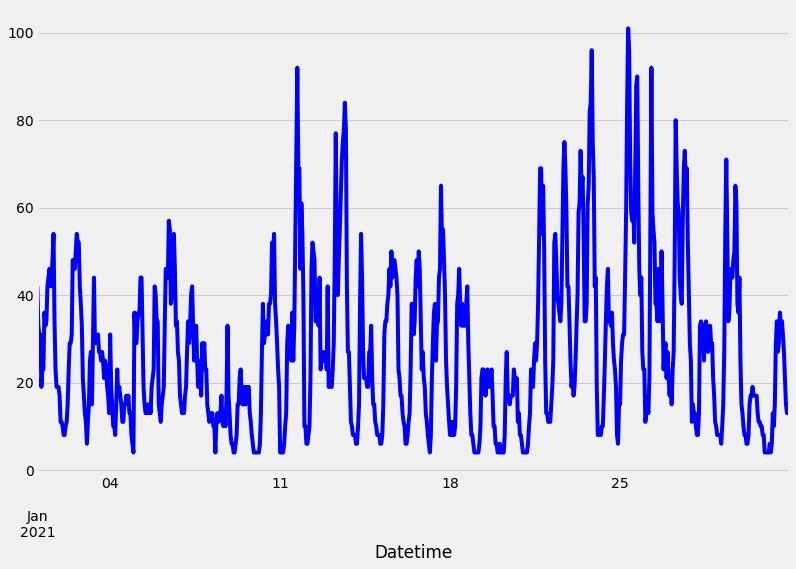

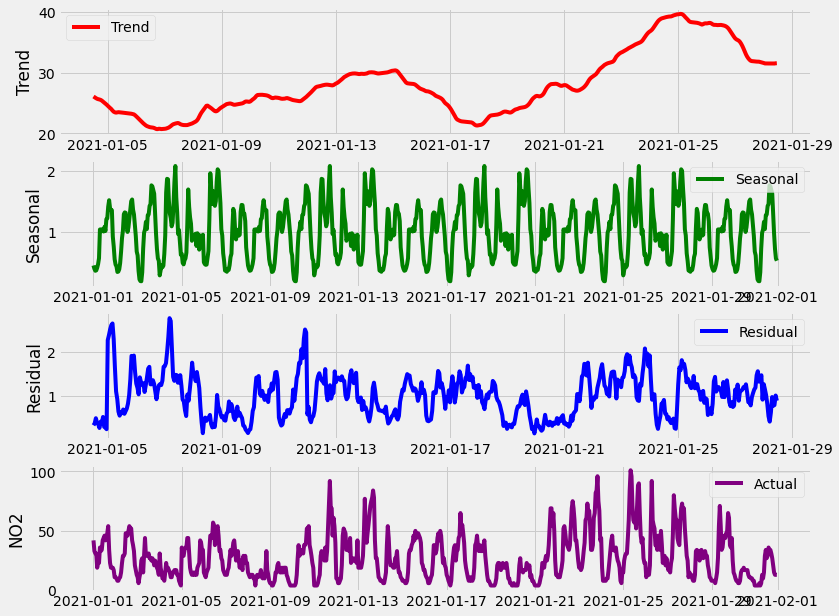

In [38]:
df_seawk = df_data.loc[(df_data.index >= "2021-01-01") & (df_data.index < "2021-02-01")]
df_seawk = df_seawk.sort_index()
df_seawk["NO2"].plot(color="blue", label="NO2")

result = seasonal_decompose(df_seawk["NO2"], period=24*7, model="multiplicative")

rcParams['figure.figsize'] = 12, 10

fig, axes = plt.subplots(4, 1)

# Set colors for each component
axes[0].plot(result.trend, color="red", label="Trend")
axes[1].plot(result.seasonal, color="green", label="Seasonal")
axes[2].plot(result.resid, color="blue", label="Residual")
axes[3].plot(df_seawk["NO2"], color="purple", label="Actual")

# Set legends and axis titles
axes[0].legend()
axes[0].set_ylabel("Trend")
axes[1].legend()
axes[1].set_ylabel("Seasonal")
axes[2].legend()
axes[2].set_ylabel("Residual")
axes[3].legend()
axes[3].set_ylabel("NO2")

### Monthly seasonlity 2018-2021

Text(0, 0.5, 'NO2')

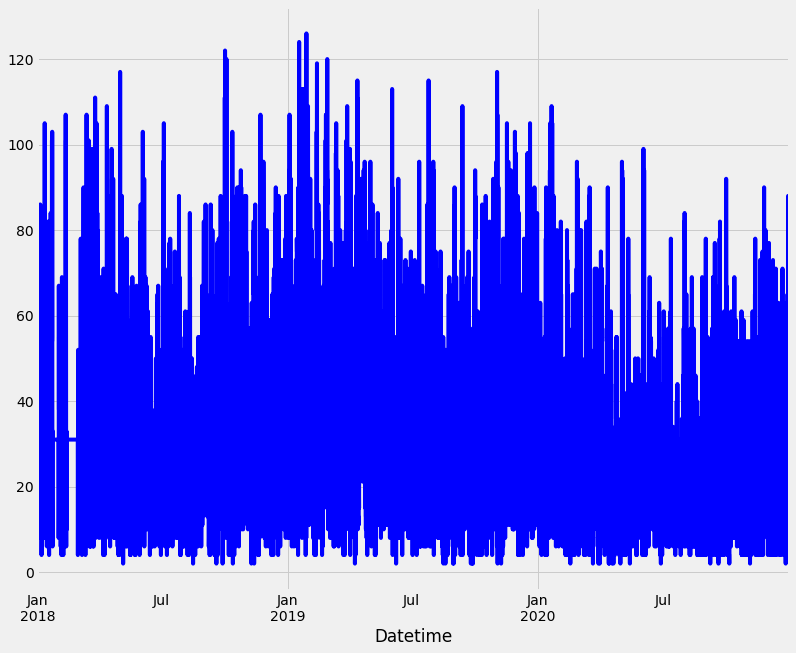

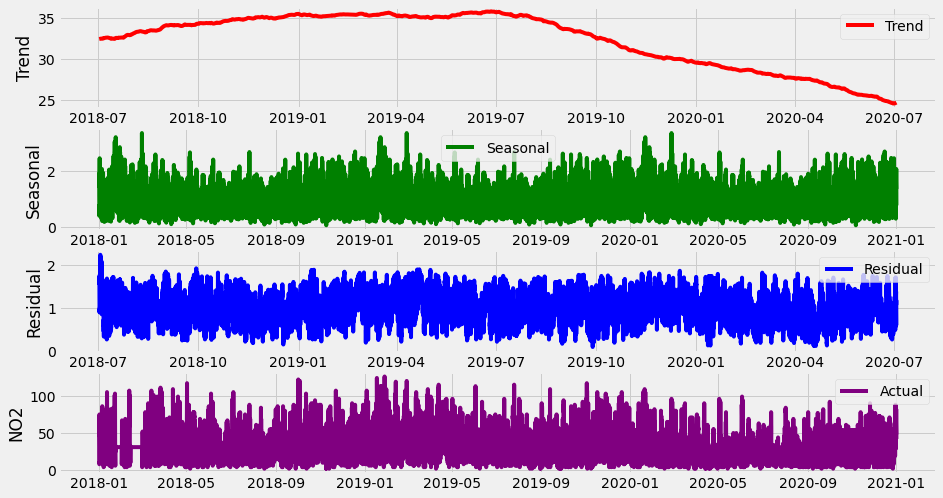

In [39]:
df_seamth = df_data.loc[(df_data.index >= "2018-01-01") & (df_data.index < "2021-01-01")]
df_seamth = df_seamth.sort_index()
df_seamth["NO2"].plot(color="blue", label="NO2")

result = seasonal_decompose(df_seamth["NO2"], period=24*7*52, model="multiplicative")

rcParams['figure.figsize'] = 14, 8

fig, axes = plt.subplots(4, 1)

# Set colors for each component
axes[0].plot(result.trend, color="red", label="Trend")
axes[1].plot(result.seasonal, color="green", label="Seasonal")
axes[2].plot(result.resid, color="blue", label="Residual")
axes[3].plot(df_seamth["NO2"], color="purple", label="Actual")

# Set legends and axis titles
axes[0].legend()
axes[0].set_ylabel("Trend")
axes[1].legend()
axes[1].set_ylabel("Seasonal")
axes[2].legend()
axes[2].set_ylabel("Residual")
axes[3].legend()
axes[3].set_ylabel("NO2")

Datetime
2018-01-01 00:00:00    0.817432
2018-01-01 01:00:00    0.485975
2018-01-01 02:00:00    0.401670
2018-01-01 03:00:00    0.486021
2018-01-01 04:00:00    0.581532
                         ...   
2020-12-31 19:00:00    1.844401
2020-12-31 20:00:00    1.234516
2020-12-31 21:00:00    1.031362
2020-12-31 22:00:00    0.859572
2020-12-31 23:00:00    0.774887
Name: seasonal, Length: 26304, dtype: float64


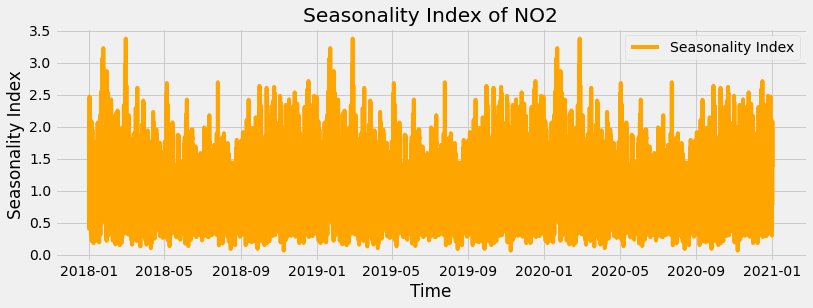

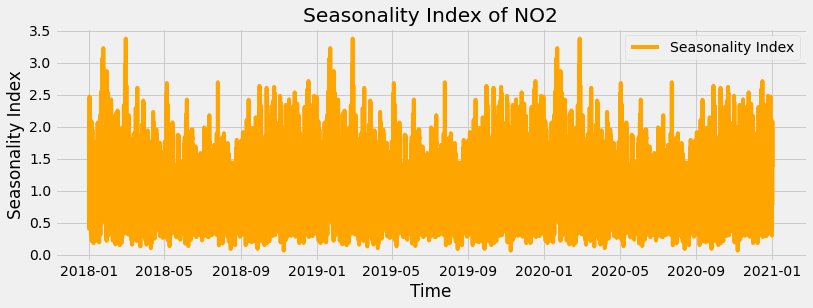

In [40]:
import numpy as np

# Calculate the seasonality index
seasonality_index = result.seasonal / np.mean(result.seasonal)
print(seasonality_index)

# Calculate the seasonality index
seasonality_index = result.seasonal / np.mean(result.seasonal)

# Plot the seasonality index
plt.figure(figsize=(12, 4))
plt.plot(seasonality_index, color="orange", label="Seasonality Index")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Seasonality Index")
plt.title("Seasonality Index of NO2")
plt.show()
# Plot the seasonality index
plt.figure(figsize=(12, 4))
plt.plot(seasonality_index, color="orange", label="Seasonality Index")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Seasonality Index")
plt.title("Seasonality Index of NO2")
plt.show()

## Autocorrellation Plots

In [41]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
print(acf(df_data["NO2"]))

[ 1.00000000e+00  8.92825113e-01  7.58754075e-01  6.20566551e-01
  4.95985889e-01  3.90839733e-01  3.07948745e-01  2.48693051e-01
  2.09876074e-01  1.83898648e-01  1.61291670e-01  1.40133375e-01
  1.22542571e-01  1.10394288e-01  1.03722125e-01  9.95621426e-02
  1.00646535e-01  1.14099775e-01  1.45937454e-01  1.94022470e-01
  2.54713912e-01  3.23146294e-01  3.92918791e-01  4.49032676e-01
  4.70417411e-01  4.43140642e-01  3.79770221e-01  3.01704101e-01
  2.25052569e-01  1.55930028e-01  9.81639896e-02  5.65325525e-02
  2.95760722e-02  1.47760883e-02  4.31300711e-03 -5.85175431e-03
 -1.31390509e-02 -1.60376072e-02 -1.38817536e-02 -9.84011758e-03
 -9.18358688e-04  1.87503130e-02  5.44743339e-02  1.05805539e-01
  1.67096949e-01  2.32971800e-01  2.98842102e-01  3.50158798e-01
  3.70428840e-01  3.50964472e-01]


C:\Users\osesi\anaconda3\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


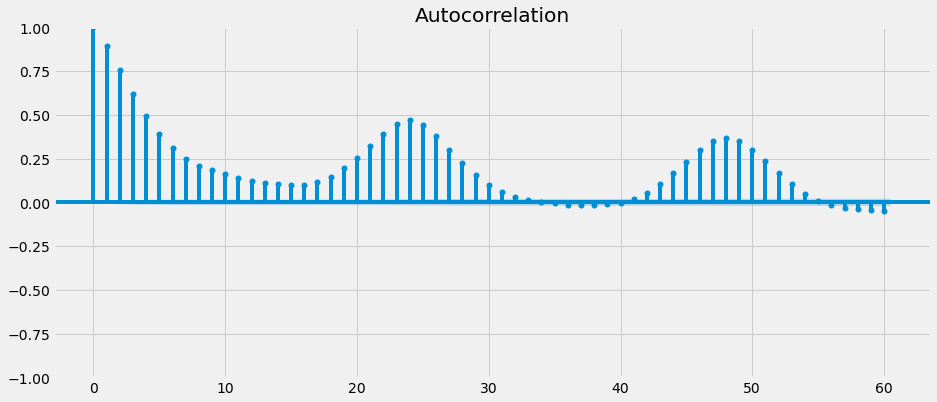

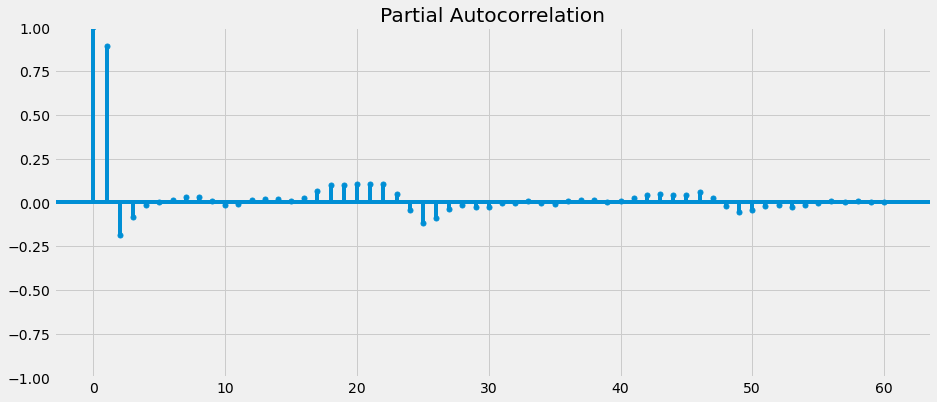

In [42]:
rcParams["figure.figsize"]= 14,6
plot_acf(df_data["NO2"], lags=60);
plot_pacf(df_data["NO2"], lags=60);

In [43]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
print(pacf(df_data["NO2"]))

[ 1.00000000e+00  8.92835296e-01 -1.89225552e-01 -8.23960079e-02
 -1.27784836e-02  1.00036368e-03  1.49496490e-02  3.11945016e-02
  2.90693903e-02  9.90513092e-03 -1.61934105e-02 -7.03099369e-03
  1.09826450e-02  1.99783990e-02  1.97036878e-02  6.66388280e-03
  2.54905924e-02  6.42645713e-02  9.78527148e-02  9.82634611e-02
  1.03313563e-01  1.06479833e-01  1.02108509e-01  5.01977436e-02
 -4.22948110e-02 -1.19154941e-01 -8.90340950e-02 -3.96373999e-02
 -1.67887603e-02 -2.61013318e-02 -2.64539524e-02 -6.54529749e-03
 -4.97657866e-03  8.04493773e-03 -4.33116451e-03 -8.12989949e-03
  8.44321798e-03  1.25346017e-02  1.62171532e-02 -2.20124520e-04
  7.59051980e-03  2.24545709e-02  4.04757143e-02  4.71234793e-02
  4.13595583e-02  4.38960564e-02  5.70471787e-02  2.39656523e-02
 -2.10144753e-02 -5.42397334e-02]


In [44]:
#Compute the autocorrelation of the 'NO2' column
autocorr = df_data['NO2'].autocorr()

# Print the autocorrelation value
print("Autocorrelation:", autocorr)

Autocorrelation: 0.8928390591365858


## Adf fuller stationarity test

In [47]:
## Testing For Stationarity
from statsmodels.tsa.stattools import adfuller, kpss 
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(df_data['NO2'])

In [48]:
test_result

(-24.34731163525074,
 0.0,
 66,
 87605,
 {'1%': -3.4304246474701263,
  '5%': -2.8615729929608564,
  '10%': -2.566787561007527},
 621730.0876044527)

In [49]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(NO2):
    result=adfuller(NO2)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Reject the null hypothesis, Data has no unit root and is stationary")
    else:
        print("Time series has a unit root, thus it is non-stationary ")

In [50]:
adfuller_test(df_data['NO2'])

ADF Test Statistic : -24.34731163525074
p-value : 0.0
#Lags Used : 66
Number of Observations Used : 87605
Reject the null hypothesis, Data has no unit root and is stationary
